# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-mu.new.57.72.167.176.191.fix.120.155.157.163.164.165.174.188.prep'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Papua New Guinea', 'Gambia', 'Bahamas']

,
 

3

: 

[

'Montenegro'

, 

'Lesotho'

, 

'Brunei'

, 

'Peru'

, 

'Grenada'

,
     

'Antigua and Barbuda'

, 

'Seychelles'

, 

'Mauritius'

, 

'Tanzania'

]

,
 

4

: 

[

'Botswana'

, 

'Saint Lucia'

, 

'Madagascar'

,
     

'Saint Vincent and the Grenadines'

, 

'Eritrea'

, 

'Venezuela'

, 

'Malawi'

,
     

'Suriname'

, 

'South Sudan'

, 

'Guatemala'

, 

'Iceland'

, 

'Ethiopia'

, 

'Benin'

,
     

'Zambia'

, 

'Central African Republic'

, 

'Norway'

, 

'Paraguay'

,
     

'Liechtenstein'

, 

'New Zealand'

, 

'Kyrgyzstan'

, 

'Belize'

, 

'Guyana'

,
     

'Zimbabwe'

, 

'Sao Tome and Principe'

, 

'Palestine'

]

,
 

5

: 

[

'Libya'

, 

'Lebanon'

, 

'Philippines'

, 

'Malta'

, 

'Costa Rica'

, 

'Slovakia'

,
     

'Chad'

, 

'Japan'

, 

'Morocco'

, 

'Bolivia'

, 

'Netherlands'

, 

'Comoros'

, 

'Angola'

,
     

'Kosovo'

, 

'Andorra'

, 

'Bosnia and Herzegovina'

, 

'Guinea-Bissau'

, 

'Niger'

,
     

'Colombia'

, 

'Haiti'

, 

'Ireland'

, 

'Slovenia'

, 

'Equatorial Guinea'

, 

'Kenya'

,
     

'Bermuda'

, 

'Argentina'

, 

'Croatia'

, 

'Nicaragua'

, 

'Swaziland'

, 

'Syria'

,
     

'Cambodia'

]

,
 

6

: 

[

'El Salvador'

, 

'San Marino'

, 

'Burundi'

, 

'Kazakhstan'

, 

'Latvia'

, 

'Bulgaria'

,
     

'Rwanda'

, 

'Tajikistan'

, 

'Iraq'

, 

'Thailand'

, 

'Albania'

, 

'Australia'

,
     

'Mongolia'

, 

'Sudan'

, 

'Uganda'

, 

'Mauritania'

, 

'Macedonia'

, 

'Barbados'

,
     

'Congo'

, 

'Togo'

, 

'Spain'

, 

'Azerbaijan'

, 

'Afghanistan'

,
     

'Trinidad and Tobago'

, 

'India'

, 

'Yemen'

, 

'Cameroon'

, 

'Ecuador'

,
     

'South Africa'

, 

'Honduras'

, 

'Switzerland'

, 

'Taiwan'

, 

'Germany'

, 

'Cyprus'

,
     

'Sri Lanka'

, 

'Uzbekistan'

, 

'Oman'

, 

'Somalia'

, 

'Panama'

, 

'Cape Verde'

,
     

'Israel'

]

,
 

7

: 

[

'Belgium'

, 

'Gabon'

, 

'Algeria'

, 

'Mozambique'

, 

'Indonesia'

, 

'Serbia'

,
     

'Pakistan'

, 

'Sierra Leone'

, 

'Finland'

, 

'Myanmar'

, 

'Cuba'

, 

'Mexico'

,
     

'Djibouti'

, 

'Dominican Republic'

, 

'Liberia'

, 

'Luxembourg'

, 

'Monaco'

,
     

'Brazil'

, 

'Egypt'

, 

'Qatar'

, 

'Lithuania'

, 

'Bangladesh'

, 

'Greece'

,
     

'Maldives'

, 

'China'

, 

'Ghana'

, 

'Burkina Faso'

, 

'Armenia'

, 

'Bhutan'

,
     

'Estonia'

, 

'Mali'

, 

'Tunisia'

, 

'Belarus'

, 

'Jordan'

, 

'Nepal'

]

,
 

8

: 

[

'France'

, 

'Russia'

, 

'United States'

, 

'Saudi Arabia'

, 

'Hungary'

, 

'Romania'

,
     

'Singapore'

, 

'Chile'

, 

'Korea, South'

, 

'Georgia'

, 

'Malaysia'

, 

'Uruguay'

,
     

'Turkey'

, 

'Vietnam'

, 

'Nigeria'

, 

'Jamaica'

, 

'Denmark'

]

,
 

9

: 

[

'Poland'

, 

'Italy'

, 

'Kuwait'

, 

'Czech Republic'

, 

'Moldova'

, 

'Canada'

,
     

'United Arab Emirates'

, 

'Portugal'

, 

'Ukraine'

, 

'Austria'

]

,
 

10

: 

['Guinea', 'Iran', 'Bahrain', 'Senegal']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

14

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Poland'

, 

'Italy'

, 

'Kuwait'

, 

'Czech Republic'

, 

'Moldova'

, 

'Canada'

,
     

'United Arab Emirates'

, 

'Portugal'

, 

'Ukraine'

, 

'Austria'

]

,
 

10

: 

['Guinea', 'Iran', 'Bahrain', 'Senegal']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Guinea  1st    Past  02May2020  11May2020    12414318
        2nd    Past  12May2020  19May2020    12414318
        3rd    Past  20May2020  28May2020    12414318
        4th    Past  29May2020  08Jun2020    12414318
        5th    Past  09Jun2020  17Jun2020    12414318
        6th    Past  18Jun2020  02Jul2020    12414318
        7th    Past  03Jul2020  14Jul2020    12414318
        8th    Past  15Jul2020  23Jul2020    12414318
        9th    Past  24Jul2020  03Aug2020    12414318
        10th   Past  04Aug2020  16Aug2020    12414318
Iran    1st    Past  28Mar2020  12Apr2020    81800269
        2nd    Past  13Apr2020  04May2020    81800269
        3rd    Past  05May2020  20May2020    81800269
        4th    Past  21May2020  02Jun2020    81800269
        5th    Past  03Jun2020  15Jun2020    81800269
        6th    Past  16Jun2020  27Jun2020    81800269
        7th    Past  28Jun2020  09Jul2020    81800269
        8th    Past  10Jul2020  21Jul2020    81800269
        9th    Past  22Jul2020  02Aug2020    81800269
        10th   Past  03Aug2020  16Aug2020    81800269
Bahrain 1st    Past  06May2020  25May2020     1569439
        2nd    Past  26May2020  04Jun2020     1569439
        3rd    Past  05Jun2020  13Jun2020     1569439
        4th    Past  14Jun2020  21Jun2020     1569439
        5th    Past  22Jun2020  29Jun2020     1569439
        6th    Past  30Jun2020  07Jul2020     1569439
        7th    Past  08Jul2020  15Jul2020     1569439
        8th    Past  16Jul2020  25Jul2020     1569439
        9th    Past  26Jul2020  04Aug2020     1569439
        10th   Past  05Aug2020  16Aug2020     1569439
Senegal 1st    Past  30Apr2020  14May2020    15854360
        2nd    Past  15May2020  29May2020    15854360
        3rd    Past  30May2020  09Jun2020    15854360
        4th    Past  10Jun2020  19Jun2020    15854360
        5th    Past  20Jun2020  30Jun2020    15854360
        6th    Past  01Jul2020  10Jul2020    15854360
        7th    Past  11Jul2020  20Jul2020    15854360
        8th    Past  21Jul2020  28Jul2020    15854360
        9th    Past  29Jul2020  06Aug2020    15854360
        10th   Past  07Aug2020  16Aug2020    15854360

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	KWT,  3rd phase (06Jun2020 - 15Jun2020): finished  628 trials in 0 min 15 sec

	SEN, 10th phase (07Aug2020 - 16Aug2020): finished  632 trials in 0 min 15 sec

	BHR,  6th phase (30Jun2020 - 07Jul2020): finished  628 trials in 0 min 15 sec

	CAN,  9th phase (26Jul2020 - 16Aug2020): finished 1908 trials in 1 min  0 sec

	GIN,  9th phase (24Jul2020 - 03Aug2020): finished 1906 trials in 1 min  0 sec

	MDA,  1st phase (12May2020 - 28May2020): finished 1902 trials in 1 min  0 sec

	IRN, 10th phase (03Aug2020 - 16Aug2020): finished  624 trials in 0 min 15 sec

	PRT,  8th phase (17Jul2020 - 29Jul2020): finished  619 trials in 0 min 15 sec

	CAN,  2nd phase (16Apr2020 - 23Apr2020): finished 1905 trials in 1 min  0 sec

	UKR,  7th phase (17Jul2020 - 24Jul2020): finished  233 trials in 0 min  5 sec

	CZE,  6th phase (25Jun2020 - 08Jul2020): finished 1911 trials in 1 min  0 sec

	GIN,  8th phase (15Jul2020 - 23Jul2020): finished 1918 trials in 1 min  0 sec

	ITA,  4th phase (22Apr2020 - 01May2020): finished  432 trials in 0 min 10 sec

	BHR,  3rd phase (05Jun2020 - 13Jun2020): finished 1908 trials in 1 min  0 sec

	BHR,  4th phase (14Jun2020 - 21Jun2020): finished 1927 trials in 1 min  0 sec

	POL,  7th phase (14Jul2020 - 24Jul2020): finished  435 trials in 0 min 10 sec

	ITA,  2nd phase (01Apr2020 - 12Apr2020): finished  200 trials in 0 min  5 sec

	CAN,  7th phase (07Jun2020 - 01Jul2020): finished  405 trials in 0 min 10 sec

	PRT,  4th phase (07Jun2020 - 16Jun2020): finished  782 trials in 0 min 20 sec

	AUT,  7th phase (18Jul2020 - 28Jul2020): finished  230 trials in 0 min  5 sec

	MDA,  2nd phase (29May2020 - 09Jun2020): finished 1900 trials in 1 min  0 sec

	BHR,  2nd phase (26May2020 - 04Jun2020): finished 1125 trials in 0 min 30 sec

	CZE,  4th phase (16May2020 - 06Jun2020): finished  426 trials in 0 min 10 sec

	ARE,  3rd phase (25May2020 - 03Jun2020): finished 1109 trials in 0 min 30 sec

	IRN,  3rd phase (05May2020 - 20May2020): finished  429 trials in 0 min 10 sec

	CAN,  6th phase (25May2020 - 06Jun2020): finished  228 trials in 0 min  5 sec

	AUT,  6th phase (30Jun2020 - 17Jul2020): finished 1909 trials in 1 min  0 sec

	ARE,  1st phase (28Apr2020 - 12May2020): finished 1914 trials in 1 min  0 sec

	POL,  1st phase (23Apr2020 - 08May2020): finished 1255 trials in 0 min 35 sec

	MDA,  5th phase (27Jun2020 - 08Jul2020): finished 1911 trials in 1 min  0 sec

	SEN,  2nd phase (15May2020 - 29May2020): finished 1905 trials in 1 min  0 sec

	BHR,  1st phase (06May2020 - 25May2020): finished 1888 trials in 1 min  0 sec

	PRT,  9th phase (30Jul2020 - 16Aug2020): finished  595 trials in 0 min 15 sec

	KWT,  1st phase (11May2020 - 23May2020): finished 1897 trials in 1 min  0 sec

	GIN,  2nd phase (12May2020 - 19May2020): finished 1905 trials in 1 min  0 sec

	MDA,  3rd phase (10Jun2020 - 17Jun2020): finished  435 trials in 0 min 10 sec

	ITA,  6th phase (10May2020 - 19May2020): finished  432 trials in 0 min 10 sec

	SEN,  6th phase (01Jul2020 - 10Jul2020): finished 1899 trials in 1 min  0 sec

	SEN,  8th phase (21Jul2020 - 28Jul2020): finished 1907 trials in 1 min  0 sec

	POL,  6th phase (01Jul2020 - 13Jul2020): finished  436 trials in 0 min 10 sec

	SEN,  7th phase (11Jul2020 - 20Jul2020): finished  434 trials in 0 min 10 sec

	KWT,  9th phase (05Aug2020 - 16Aug2020): finished  435 trials in 0 min 10 sec

	CZE,  5th phase (07Jun2020 - 24Jun2020): finished  231 trials in 0 min  5 sec

	MDA,  8th phase (30Jul2020 - 06Aug2020): finished  441 trials in 0 min 10 sec

	ITA,  9th phase (07Jul2020 - 16Aug2020): finished  424 trials in 0 min 10 sec

	BHR,  5th phase (22Jun2020 - 29Jun2020): finished 1909 trials in 1 min  0 sec

	IRN,  4th phase (21May2020 - 02Jun2020): finished 1907 trials in 1 min  0 sec

	CZE,  3rd phase (28Apr2020 - 15May2020): finished 1883 trials in 1 min  0 sec

	SEN,  3rd phase (30May2020 - 09Jun2020): finished 1902 trials in 1 min  0 sec

	SEN,  5th phase (20Jun2020 - 30Jun2020): finished  620 trials in 0 min 15 sec

	ITA,  3rd phase (13Apr2020 - 21Apr2020): finished  437 trials in 0 min 10 sec

	PRT,  7th phase (08Jul2020 - 16Jul2020): finished  231 trials in 0 min  5 sec

	AUT,  1st phase (29Mar2020 - 05Apr2020): finished  231 trials in 0 min  5 sec

	BHR,  7th phase (08Jul2020 - 15Jul2020): finished 1903 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 19Jun2020): finished 1886 trials in 1 min  0 sec

	PRT,  6th phase (26Jun2020 - 07Jul2020): finished  226 trials in 0 min  5 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 1899 trials in 1 min  0 sec

	PRT,  5th phase (17Jun2020 - 25Jun2020): finished  230 trials in 0 min  5 sec

	POL,  9th phase (02Aug2020 - 16Aug2020): finished 1880 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished 1116 trials in 0 min 30 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1115 trials in 0 min 30 sec

	AUT,  3rd phase (14Apr2020 - 23Apr2020): finished  418 trials in 0 min 10 sec

	KWT,  8th phase (24Jul2020 - 04Aug2020): finished  434 trials in 0 min 10 sec

	PRT,  2nd phase (18May2020 - 28May2020): finished 1894 trials in 1 min  0 sec

	POL,  4th phase (05Jun2020 - 16Jun2020): finished  428 trials in 0 min 10 sec

	GIN,  6th phase (18Jun2020 - 02Jul2020): finished 1882 trials in 1 min  0 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished 1891 trials in 1 min  0 sec

	ITA,  1st phase (24Mar2020 - 31Mar2020): finished  230 trials in 0 min  5 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  428 trials in 0 min 10 sec

	CAN,  5th phase (16May2020 - 24May2020): finished  230 trials in 0 min  5 sec

	MDA,  4th phase (18Jun2020 - 26Jun2020): finished  798 trials in 0 min 20 sec

	IRN,  8th phase (10Jul2020 - 21Jul2020): finished  231 trials in 0 min  5 sec

	GIN, 10th phase (04Aug2020 - 16Aug2020): finished  623 trials in 0 min 15 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1919 trials in 1 min  0 sec

	CAN,  4th phase (07May2020 - 15May2020): finished  221 trials in 0 min  5 sec

	AUT,  2nd phase (06Apr2020 - 13Apr2020): finished  437 trials in 0 min 10 sec

	POL,  8th phase (25Jul2020 - 01Aug2020): finished  630 trials in 0 min 15 sec

	MDA,  7th phase (20Jul2020 - 29Jul2020): finished  436 trials in 0 min 10 sec

	IRN,  1st phase (28Mar2020 - 12Apr2020): finished 1902 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 24May2020): finished 1895 trials in 1 min  0 sec

	CZE,  7th phase (09Jul2020 - 20Jul2020): finished 1898 trials in 1 min  0 sec

	CZE,  2nd phase (17Apr2020 - 27Apr2020): finished  424 trials in 0 min 10 sec

	GIN,  4th phase (29May2020 - 08Jun2020): finished 1891 trials in 1 min  0 sec

	UKR,  2nd phase (23May2020 - 08Jun2020): finished 1259 trials in 0 min 35 sec

	BHR,  8th phase (16Jul2020 - 25Jul2020): finished  432 trials in 0 min 10 sec

	UKR,  5th phase (28Jun2020 - 07Jul2020): finished  437 trials in 0 min 10 sec

	IRN,  9th phase (22Jul2020 - 02Aug2020): finished  230 trials in 0 min  5 sec

	UKR,  1st phase (07May2020 - 22May2020): finished 1890 trials in 1 min  0 sec

	AUT,  4th phase (24Apr2020 - 14May2020): finished  428 trials in 0 min 10 sec

	ITA,  5th phase (02May2020 - 09May2020): finished  232 trials in 0 min  5 sec

	BHR,  9th phase (26Jul2020 - 04Aug2020): finished  230 trials in 0 min  5 sec

	KWT,  2nd phase (24May2020 - 05Jun2020): finished 1911 trials in 1 min  0 sec

	ARE,  8th phase (11Jul2020 - 25Jul2020): finished 1917 trials in 1 min  0 sec

	SEN,  9th phase (29Jul2020 - 06Aug2020): finished  421 trials in 0 min 10 sec

	IRN,  7th phase (28Jun2020 - 09Jul2020): finished  199 trials in 0 min  5 sec

	CZE,  1st phase (08Apr2020 - 16Apr2020): finished 1893 trials in 1 min  0 sec

	IRN,  6th phase (16Jun2020 - 27Jun2020): finished 1889 trials in 1 min  0 sec

	IRN,  2nd phase (13Apr2020 - 04May2020): finished  610 trials in 0 min 15 sec

	GIN,  5th phase (09Jun2020 - 17Jun2020): finished  620 trials in 0 min 15 sec

	KWT,  6th phase (05Jul2020 - 14Jul2020): finished  430 trials in 0 min 10 sec

	CAN,  3rd phase (24Apr2020 - 06May2020): finished 1664 trials in 0 min 50 sec

	POL,  2nd phase (09May2020 - 20May2020): finished 1259 trials in 0 min 35 sec

	GIN,  7th phase (03Jul2020 - 14Jul2020): finished 1915 trials in 1 min  0 sec

	CZE,  9th phase (31Jul2020 - 16Aug2020): finished  619 trials in 0 min 15 sec

	POL,  3rd phase (21May2020 - 04Jun2020): finished  795 trials in 0 min 20 sec

	AUT,  5th phase (15May2020 - 29Jun2020): finished  413 trials in 0 min 10 sec

	ITA,  8th phase (05Jun2020 - 06Jul2020): finished  417 trials in 0 min 10 sec

	MDA,  6th phase (09Jul2020 - 19Jul2020): finished  228 trials in 0 min  5 sec

	ITA,  7th phase (20May2020 - 04Jun2020): finished  435 trials in 0 min 10 sec

	UKR,  3rd phase (09Jun2020 - 19Jun2020): finished 1120 trials in 0 min 30 sec

	CZE,  8th phase (21Jul2020 - 30Jul2020): finished 1902 trials in 1 min  0 sec

	UKR,  4th phase (20Jun2020 - 27Jun2020): finished  604 trials in 0 min 15 sec

	SEN,  1st phase (30Apr2020 - 14May2020): finished 1898 trials in 1 min  0 sec

	CAN,  1st phase (08Apr2020 - 15Apr2020): finished 1911 trials in 1 min  0 sec

	PRT,  3rd phase (29May2020 - 06Jun2020): finished  451 trials in 0 min 10 sec

	KWT,  4th phase (16Jun2020 - 24Jun2020): finished 1938 trials in 1 min  0 sec

	IRN,  5th phase (03Jun2020 - 15Jun2020): finished  840 trials in 0 min 20 sec

	CAN,  8th phase (02Jul2020 - 25Jul2020): finished 1979 trials in 1 min  0 sec

	GIN,  3rd phase (20May2020 - 28May2020): finished 2006 trials in 1 min  0 sec

	KWT,  5th phase (25Jun2020 - 04Jul2020): finished 2092 trials in 1 min  0 sec

	PRT,  1st phase (05May2020 - 17May2020): finished 2081 trials in 1 min  0 sec

Completed optimization. Total: 18 min 38 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Guinea  1st    Past  02May2020  11May2020    12414318  SIR-F  1.77   
        2nd    Past  12May2020  19May2020    12414318  SIR-F  1.12   
        3rd    Past  20May2020  28May2020    12414318  SIR-F  2.15   
        4th    Past  29May2020  08Jun2020    12414318  SIR-F  0.67   
        5th    Past  09Jun2020  17Jun2020    12414318  SIR-F  0.91   
        6th    Past  18Jun2020  02Jul2020    12414318  SIR-F  0.58   
        7th    Past  03Jul2020  14Jul2020    12414318  SIR-F  1.58   
        8th    Past  15Jul2020  23Jul2020    12414318  SIR-F  0.51   
        9th    Past  24Jul2020  03Aug2020    12414318  SIR-F  1.09   
        10th   Past  04Aug2020  16Aug2020    12414318  SIR-F   1.4   
Iran    1st    Past  28Mar2020  12Apr2020    81800269  SIR-F  1.35   
        2nd    Past  13Apr2020  04May2020    81800269  SIR-F   0.7   
        3rd    Past  05May2020  20May2020    81800269  SIR-F  1.42   
        4th    Past  21May2020  02Jun2020    81800269  SIR-F  1.17   
        5th    Past  03Jun2020  15Jun2020    81800269  SIR-F   1.1   
        6th    Past  16Jun2020  27Jun2020    81800269  SIR-F  0.96   
        7th    Past  28Jun2020  09Jul2020    81800269  SIR-F  0.92   
        8th    Past  10Jul2020  21Jul2020    81800269  SIR-F  0.86   
        9th    Past  22Jul2020  02Aug2020    81800269  SIR-F  1.12   
        10th   Past  03Aug2020  16Aug2020    81800269  SIR-F  1.06   
Bahrain 1st    Past  06May2020  25May2020     1569439  SIR-F  2.63   
        2nd    Past  26May2020  04Jun2020     1569439  SIR-F  1.44   
        3rd    Past  05Jun2020  13Jun2020     1569439  SIR-F  1.02   
        4th    Past  14Jun2020  21Jun2020     1569439  SIR-F  0.99   
        5th    Past  22Jun2020  29Jun2020     1569439  SIR-F  0.93   
        6th    Past  30Jun2020  07Jul2020     1569439  SIR-F  0.84   
        7th    Past  08Jul2020  15Jul2020     1569439  SIR-F  0.86   
        8th    Past  16Jul2020  25Jul2020     1569439  SIR-F  0.87   
        9th    Past  26Jul2020  04Aug2020     1569439  SIR-F  0.88   
        10th   Past  05Aug2020  16Aug2020     1569439      -     -   
Senegal 1st    Past  30Apr2020  14May2020    15854360  SIR-F  2.46   
        2nd    Past  15May2020  29May2020    15854360  SIR-F  1.26   
        3rd    Past  30May2020  09Jun2020    15854360  SIR-F  0.94   
        4th    Past  10Jun2020  19Jun2020    15854360  SIR-F  0.97   
        5th    Past  20Jun2020  30Jun2020    15854360  SIR-F  1.75   
        6th    Past  01Jul2020  10Jul2020    15854360  SIR-F  1.27   
        7th    Past  11Jul2020  20Jul2020    15854360  SIR-F  1.36   
        8th    Past  21Jul2020  28Jul2020    15854360  SIR-F   1.7   
        9th    Past  29Jul2020  06Aug2020    15854360  SIR-F  1.64   
        10th   Past  07Aug2020  16Aug2020    15854360  SIR-F  2.39   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Guinea  1st    6.00055e-05  0.000122059   0.0126694  0.00704409  360   
        2nd     0.00015376  0.000176078   0.0130639   0.0114741  360   
        3rd    0.000666021  3.68953e-05   0.0142059  0.00655421  360   
        4th    0.000663441  2.37678e-05   0.0117649   0.0174344  360   
        5th    0.000255548  7.58396e-05  0.00830334  0.00905585  360   
        6th     0.00127657  8.19389e-05  0.00749745   0.0128598  360   
        7th    0.000121749  0.000104162   0.0125111  0.00783211  360   
        8th     0.00126652  8.19332e-05   0.0163105   0.0318211  360   
        9th    0.000130921  0.000168203   0.0178264   0.0161869  360   
        10th   0.000665124  3.69282e-05   0.0180917   0.0128322  360   
Iran    1st      0.0523827  0.000156313    0.023055   0.0160018  360   
        2nd      0.0268142  0.000725311   0.0182223   0.0246228  360   
        3rd      0.0183729   0.00048302   0.0265923   0.0178538  3

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-23,Poland,0.0336579,0.000306526,0.00909238,0.00627018,0.034,815,27,39,...,2,4,1,1,2,4,2,1,0,83.33
1,2020-04-24,Poland,0.0336579,0.000306526,0.00909238,0.00627018,0.034,815,27,39,...,2,4,1,1,2,4,2,1,0,83.33
2,2020-04-25,Poland,0.0336579,0.000306526,0.00909238,0.00627018,0.034,815,27,39,...,2,4,1,1,2,4,2,1,0,83.33
3,2020-04-26,Poland,0.0336579,0.000306526,0.00909238,0.00627018,0.034,815,27,39,...,2,4,1,1,2,4,2,1,0,83.33
4,2020-04-27,Poland,0.0336579,0.000306526,0.00909238,0.00627018,0.034,815,27,39,...,2,4,1,1,2,4,2,1,0,83.33


### $Rt$: Reprodcution number $\mathrm{[-]}$

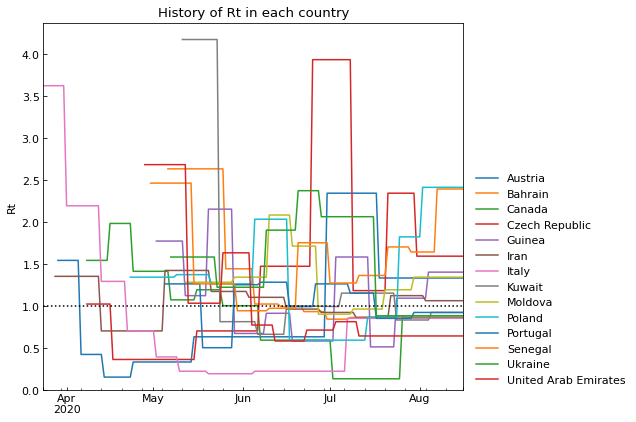

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,1.33,0.88,0.86,1.59,1.4,1.06,0.85,0.92,1.34,2.41,0.92,2.39,0.88,0.64
2020-08-13,1.33,0.88,0.86,1.59,1.4,1.06,0.85,0.92,1.34,2.41,0.92,2.39,0.88,0.64
2020-08-14,1.33,0.88,0.86,1.59,1.4,1.06,0.85,0.92,1.34,2.41,0.92,2.39,0.88,0.64
2020-08-15,1.33,0.88,0.86,1.59,1.4,1.06,0.85,0.92,1.34,2.41,0.92,2.39,0.88,0.64
2020-08-16,1.33,0.88,0.86,1.59,1.4,1.06,0.85,0.92,1.34,2.41,0.92,2.39,0.88,0.64


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

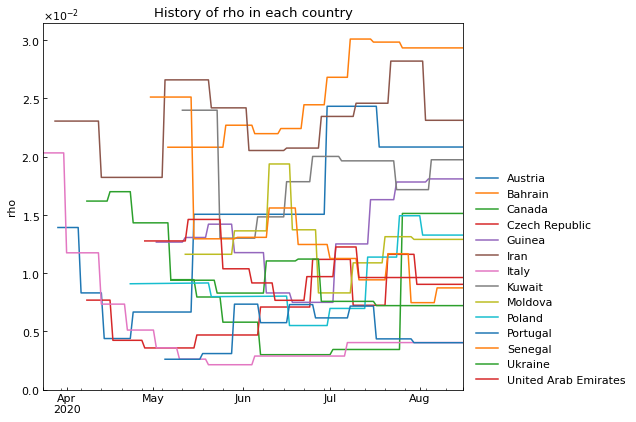

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.020829,0.029336,0.015128,0.009044,0.018092,0.023122,0.004045,0.019735,0.012902,0.013271,0.004035,0.008737,0.007216,0.009628
2020-08-13,0.020829,0.029336,0.015128,0.009044,0.018092,0.023122,0.004045,0.019735,0.012902,0.013271,0.004035,0.008737,0.007216,0.009628
2020-08-14,0.020829,0.029336,0.015128,0.009044,0.018092,0.023122,0.004045,0.019735,0.012902,0.013271,0.004035,0.008737,0.007216,0.009628
2020-08-15,0.020829,0.029336,0.015128,0.009044,0.018092,0.023122,0.004045,0.019735,0.012902,0.013271,0.004035,0.008737,0.007216,0.009628
2020-08-16,0.020829,0.029336,0.015128,0.009044,0.018092,0.023122,0.004045,0.019735,0.012902,0.013271,0.004035,0.008737,0.007216,0.009628


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

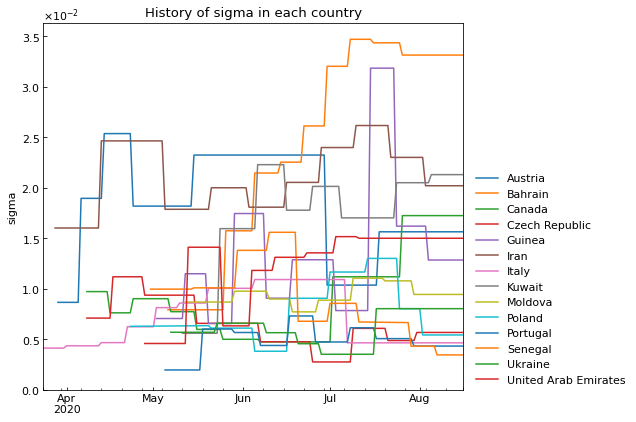

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.015626,0.033115,0.017228,0.005665,0.012832,0.020183,0.004636,0.021283,0.009428,0.005417,0.004317,0.003444,0.00802,0.014987
2020-08-13,0.015626,0.033115,0.017228,0.005665,0.012832,0.020183,0.004636,0.021283,0.009428,0.005417,0.004317,0.003444,0.00802,0.014987
2020-08-14,0.015626,0.033115,0.017228,0.005665,0.012832,0.020183,0.004636,0.021283,0.009428,0.005417,0.004317,0.003444,0.00802,0.014987
2020-08-15,0.015626,0.033115,0.017228,0.005665,0.012832,0.020183,0.004636,0.021283,0.009428,0.005417,0.004317,0.003444,0.00802,0.014987
2020-08-16,0.015626,0.033115,0.017228,0.005665,0.012832,0.020183,0.004636,0.021283,0.009428,0.005417,0.004317,0.003444,0.00802,0.014987


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

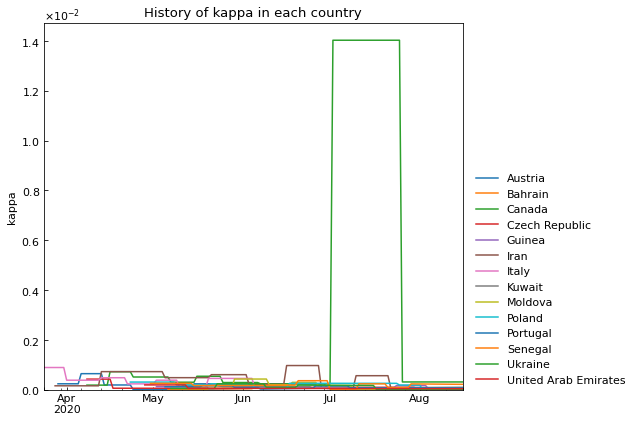

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.000068,0.000059,0.000311,0.000037,0.000037,0.000025,0.000045,0.000098,0.000046,0.000002,0.00007,0.000215,0.000014,0.000041
2020-08-13,0.000068,0.000059,0.000311,0.000037,0.000037,0.000025,0.000045,0.000098,0.000046,0.000002,0.00007,0.000215,0.000014,0.000041
2020-08-14,0.000068,0.000059,0.000311,0.000037,0.000037,0.000025,0.000045,0.000098,0.000046,0.000002,0.00007,0.000215,0.000014,0.000041
2020-08-15,0.000068,0.000059,0.000311,0.000037,0.000037,0.000025,0.000045,0.000098,0.000046,0.000002,0.00007,0.000215,0.000014,0.000041
2020-08-16,0.000068,0.000059,0.000311,0.000037,0.000037,0.000025,0.000045,0.000098,0.000046,0.000002,0.00007,0.000215,0.000014,0.000041


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

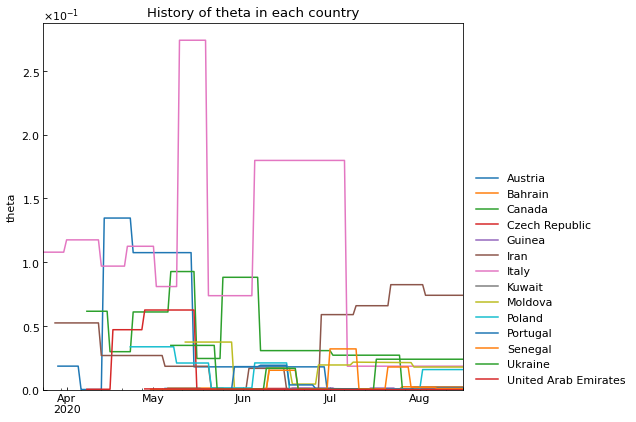

Country,Austria,Bahrain,Canada,Czech Republic,Guinea,Iran,Italy,Kuwait,Moldova,Poland,Portugal,Senegal,Ukraine,United Arab Emirates
Date,,,,,,,,,,,,,,
2020-08-12,0.000665,0.00227,0.000574,0.000665,0.000665,0.074061,0.018436,0.000433,0.017766,0.015786,0.001757,0.001022,0.023906,0.000019
2020-08-13,0.000665,0.00227,0.000574,0.000665,0.000665,0.074061,0.018436,0.000433,0.017766,0.015786,0.001757,0.001022,0.023906,0.000019
2020-08-14,0.000665,0.00227,0.000574,0.000665,0.000665,0.074061,0.018436,0.000433,0.017766,0.015786,0.001757,0.001022,0.023906,0.000019
2020-08-15,0.000665,0.00227,0.000574,0.000665,0.000665,0.074061,0.018436,0.000433,0.017766,0.015786,0.001757,0.001022,0.023906,0.000019
2020-08-16,0.000665,0.00227,0.000574,0.000665,0.000665,0.074061,0.018436,0.000433,0.017766,0.015786,0.001757,0.001022,0.023906,0.000019


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
# Reproduction number
df = analyser.track()
delay = 14
df["Rt"] = df.loc[:, "Rt"].shift(0 - abs(delay))
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 648x432 with 1 Axes>

In [20]:
# rho
df = analyser.track()
delay = 14
df["rho"] = df.loc[:, "rho"].shift(0 - abs(delay))
sns.scatterplot(data=df, x="Stringency_index", y="rho", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and rho")
plt.ylabel("rho value of SIR-F model")
plt.xlabel("Stringency index")
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 648x432 with 1 Axes>

In [21]:
# sigma
df = analyser.track()
delay = 14
df["sigma"] = df.loc[:, "sigma"].shift(0 - abs(delay))
sns.scatterplot(data=df, x="Stringency_index", y="sigma", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and sigma")
plt.ylabel("sigma value of SIR-F model")
plt.xlabel("Stringency index")
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 648x432 with 1 Axes>